# Phenotype Dataset Analysis

**Importing Libraries**

In [72]:
# Import the required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.experimental import enable_iterative_imputer  # IterativeImputer
from sklearn.impute import IterativeImputer
from scipy import stats

# Set the path to the directory containing the raw data files
path = 'C:/Users/gomed/OneDrive/Escritorio/MD_project/raw_data/'

The phenotype dataset is loaded. This dataset is provided with a tab separator format. For that reason, the following code was used.

In [2]:
# Load the phenotype dataset from a TSV file using pandas
# The dataset uses a tab separator, so sep='\t' is specified
phenotype_df = pd.read_csv(os.path.join(path, 'phenotype_data.tsv'), sep='\t')

# Display the first few rows of the DataFrame to preview the data
phenotype_df.head()

,eid,f_1239_0_0,f_1239_1_0,f_1239_2_0,f_1239_3_0,f_1249_0_0,f_1249_1_0,f_1249_2_0,f_1249_3_0,f_1259_0_0,...,f_22037_2_0,f_22037_3_0,f_22038_0_0,f_22038_1_0,f_22038_2_0,f_22038_3_0,f_22039_0_0,f_22039_1_0,f_22039_2_0,f_22039_3_0
0,1000012,0.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000021,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,...,NaN,NaN,4320.0,NaN,NaN,NaN,320.0,NaN,NaN,NaN
2,1000035,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,1000044,0.0,0.0,NaN,NaN,2.0,1.0,NaN,NaN,1.0,...,NaN,NaN,0.0,240.0,NaN,NaN,0.0,960.0,NaN,NaN
4,1000053,0.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,...,NaN,NaN,240.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


The dataset dimensions are verified using the <code>shape</code> attribute, which returns the number of rows and columns in the DataFrame.

In [3]:
# Display the dimensions of the DataFrame
# This returns a tuple with the number of rows and columns (observations, variables)
phenotype_df.shape

(502180, 509)

The chars dataset is loaded, which contains information relevant to the original dataset. This is done to gain more information, better understand the dataset, and make future associations.

In [4]:
# Olink Characters
# Open the original TSV file and skip the first 5 header lines
with open(os.path.join(path, 'phenotype_chars.tsv'), 'r') as f:
    # Read all lines and discard the first five
    lines = f.readlines()[5:]

# Write the remaining lines to a new TSV file
with open(os.path.join(path, 'phenotype_chars_table.tsv'), 'w') as f:
    # Output the extracted lines without modification
    f.writelines(lines)

In [5]:

# Load the filtered TSV into a DataFrame, using tab as the separator
phenotype_chars_df = pd.read_csv(
    os.path.join(path, 'phenotype_chars_table.tsv'),
    sep="\t"
)

# Create a new column for protein names and reorder the DataFrame
# Get the list of existing column names
cols = phenotype_chars_df.columns.tolist()

# Insert a 'pname' column just before 'ValueType', extracting
# the protein name from the 'Field' column (text before the first semicolon)
phenotype_chars_df.insert(
    cols.index('ValueType'),
    'pname',
    phenotype_chars_df['Field'].str.split(";").str[0]
)

# Display the first few rows of the updated DataFrame
phenotype_chars_df.head()


,Field,FieldID,pname,ValueType,Coding,Category,Participants,Items,Stability,Units,ItemType,Strata,Sexed,Instances,Array,Notes,Link,Path
0,Current tobacco smoking,1239,Current tobacco smoking,Categorical single,100347.0,100058,501500,597678,Complete,NaN,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""Do you smoke toba...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
1,Past tobacco smoking,1249,Past tobacco smoking,Categorical single,100348.0,100058,464200,556298,Complete,NaN,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""In the past, how ...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
2,Smoking/smokers in household,1259,Smoking/smokers in household,Categorical single,100370.0,100058,461855,552928,Complete,NaN,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""Does anyone in yo...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
3,Exposure to tobacco smoke at home,1269,Exposure to tobacco smoke at home,Integer,100291.0,100058,464571,556698,Complete,hours/week,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""At home, about ho...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...
4,Exposure to tobacco smoke outside home,1279,Exposure to tobacco smoke outside home,Integer,100291.0,100058,464571,556698,Complete,hours/week,Data,Primary,Unisex,4,1,"ACE touchscreen question """"""""Outside of your h...",http://biobank.ndph.ox.ac.uk/ukb/field.cgi?id=...,Assessment centre > Touchscreen > Lifestyle an...


The dataset cbkeys is loaded.

In [6]:
pheno_cbk_df = pd.read_csv(os.path.join(path, 'phenotype_cbkeys.tsv'), sep='\t')

# Display the first few rows of the DataFrame to preview the data
pheno_cbk_df.head()

,coding_name,code,meaning,concept,display_order,parent_code
0,7,1,Yes,NaN,1,NaN
1,7,0,No,NaN,2,NaN
2,100291,-1,Do not know,NaN,1,NaN
3,100291,-3,Prefer not to answer,NaN,2,NaN
4,100347,1,"Yes, on most or all days",NaN,1,NaN


## Preprocessing

### Missing Values

In [7]:
# Extract unique suffixes from column names (excluding 'eid')
col_names = phenotype_df.columns
suffixes = []

# Loop through each column name
for col in col_names:
    if col!= 'eid':
        # Split the column name by underscores
        parts = col.split('_')
        # If the column name has at least 4 parts, extract the 3rd and 4th parts as the suffix
        if len(parts) >= 4:
            suffixes_p = f"{parts[2]}_{parts[3]}" 
            suffixes.append(suffixes_p)

# Get a sorted list of unique suffixes found in the column names
unique_suffixes = sorted(set(suffixes))
print(unique_suffixes)

['0_0', '0_1', '0_2', '0_3', '0_4', '0_5', '0_6', '1_0', '1_1', '1_2', '2_0', '2_1', '2_2', '2_3', '2_4', '2_5', '3_0', '3_1']


In [8]:
for suffix in unique_suffixes:
    # Filter columns by the current suffix
    suffix_cols = phenotype_df.filter(regex=fr'{suffix}$')
    
    # Calculate total NA values and total cells (rows × columns)
    total_na = suffix_cols.isna().sum().sum()
    total_cells = suffix_cols.size  # Equivalent to: rows × columns
    
    # Avoid division by zero if no columns match the suffix
    if total_cells == 0:
        print(f"No columns found with suffix '{suffix}'")
        continue
    
    # Compute percentage of NA values
    na_percentage = (total_na / total_cells) * 100
    
    # Print results
    print(f"Suffix '{suffix}': {total_na} NA values ({na_percentage:.2f}%)")

Suffix '0_0': 30056979 NA values (46.40%)
Suffix '0_1': 6172546 NA values (94.55%)
Suffix '0_2': 5452518 NA values (98.71%)
Suffix '0_3': 1991363 NA values (99.14%)
Suffix '0_4': 996172 NA values (99.18%)
Suffix '0_5': 999616 NA values (99.53%)
Suffix '0_6': 500527 NA values (99.67%)
Suffix '1_0': 52272928 NA values (97.28%)
Suffix '1_1': 4003158 NA values (99.64%)
Suffix '1_2': 1504429 NA values (99.86%)
Suffix '2_0': 51412669 NA values (90.60%)
Suffix '2_1': 4466095 NA values (98.82%)
Suffix '2_2': 2000057 NA values (99.57%)
Suffix '2_3': 1002091 NA values (99.77%)
Suffix '2_4': 501405 NA values (99.85%)
Suffix '2_5': 501677 NA values (99.90%)
Suffix '3_0': 46711700 NA values (98.96%)
Suffix '3_1': 2005186 NA values (99.82%)


According to the previous results, it is evident that the tests were conducted in three (3) stages. Across these stages, only instances 0 and 1 were retained. It can be observed that instance 0 contains fewer NA values from the stage 1. Therefore, instance 0 is selected for further analysis, as it corresponds to the stage with the least amount of missing data.

For that, only the features with the suffix 0_0 will be kept. 

In [9]:
# Keep the 'eid' column + all columns ending with '0_0' (e.g., 'f_1239_0_0', 'f_1249_0_0')
# - 'eid' is explicitly preserved as an identifier column
# - col.endswith('0_0') ensures only columns with this exact suffix pattern are retained
selected_columns = ['eid'] + [col for col in phenotype_df.columns if col.endswith('0_0')]

# Create a new DataFrame containing only:
# 1. The 'eid' column
# 2. Columns matching the '0_0' suffix pattern
phenotype_dr_df = phenotype_df[selected_columns]

# Display the first rows to verify column selection and data integrity
phenotype_dr_df.head()

,eid,f_1239_0_0,f_1249_0_0,f_1259_0_0,f_1269_0_0,f_1279_0_0,f_1289_0_0,f_1299_0_0,f_1309_0_0,f_1319_0_0,...,f_20162_0_0,f_21000_0_0,f_22032_0_0,f_22033_0_0,f_22034_0_0,f_22035_0_0,f_22036_0_0,f_22037_0_0,f_22038_0_0,f_22039_0_0
0,1000012,0.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,...,NaN,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000021,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.712500,1001.0,2.0,16.0,370.0,1.0,1.0,3564.0,4320.0,320.0
2,1000035,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.462963,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000044,0.0,2.0,1.0,0.0,0.0,8.0,8.0,4.0,0.0,...,NaN,1001.0,0.0,2.0,15.0,0.0,0.0,99.0,0.0,0.0
4,1000053,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,-10.0,...,NaN,1001.0,1.0,10.0,50.0,0.0,1.0,693.0,240.0,0.0


The dataset goes from dimension 509 to 130.

In [10]:
# Size of the DataFrame after filtering
phenotype_dr_df.shape

(502180, 130)

We verify whether duplicate records exist according to the 'eid' column.

In [11]:
# Check for duplicates in 'eid'
duplicates = phenotype_dr_df[phenotype_dr_df["eid"].duplicated(keep=False)]

# Display duplicate rows (if any)
if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate rows in 'eid':")
    display(duplicates)
else:
    print("No duplicates found in 'eid'.")

No duplicates found in 'eid'.


The type of data contained in the dataset is verified

In [12]:
# Check data types of all columns
data_types = phenotype_dr_df.dtypes

# Count the number of columns per data type
type_counts = data_types.value_counts()

# Print results
for dtype, count in type_counts.items():
    print(f"Data type: {dtype} | Number of columns: {count}")

print("\nTotal number of columns:", len(phenotype_dr_df.columns))

Data type: float64 | Number of columns: 129
Data type: int64 | Number of columns: 1

Total number of columns: 130


With the dimensionality reduction previously performed, the amount of null data is looked at again.

In [13]:
missing_percentage = phenotype_dr_df.isna().mean() * 100
#missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
# Display the percentage of missing values for each column, with a % symbol
print("\nPercentage of missing values in each column:")
for col, pct in missing_percentage.items():
    print(f"{col}: {pct:.2f}%")


Percentage of missing values in each column:
eid: 0.00%
f_1239_0_0: 0.18%
f_1249_0_0: 7.99%
f_1259_0_0: 8.66%
f_1269_0_0: 7.91%
f_1279_0_0: 7.91%
f_1289_0_0: 0.18%
f_1299_0_0: 0.18%
f_1309_0_0: 0.18%
f_1319_0_0: 0.18%
f_1329_0_0: 0.18%
f_1339_0_0: 0.18%
f_1349_0_0: 0.18%
f_1359_0_0: 0.18%
f_1369_0_0: 0.18%
f_1379_0_0: 0.18%
f_1389_0_0: 0.18%
f_1408_0_0: 2.56%
f_1418_0_0: 0.20%
f_1428_0_0: 0.93%
f_1438_0_0: 0.93%
f_1448_0_0: 4.20%
f_1458_0_0: 0.20%
f_1468_0_0: 17.37%
f_1478_0_0: 0.18%
f_1488_0_0: 0.18%
f_1508_0_0: 23.14%
f_1518_0_0: 0.18%
f_1528_0_0: 0.18%
f_1538_0_0: 0.18%
f_1548_0_0: 0.93%
f_1558_0_0: 0.18%
f_1568_0_0: 31.04%
f_1578_0_0: 31.04%
f_1588_0_0: 31.04%
f_1598_0_0: 31.04%
f_1608_0_0: 31.04%
f_1618_0_0: 22.92%
f_1628_0_0: 8.38%
f_2178_0_0: 0.18%
f_2188_0_0: 0.18%
f_2296_0_0: 0.18%
f_2306_0_0: 0.18%
f_2345_0_0: 0.18%
f_2355_0_0: 69.05%
f_2365_0_0: 54.49%
f_2443_0_0: 0.19%
f_2453_0_0: 0.19%
f_2463_0_0: 0.19%
f_2473_0_0: 0.19%
f_2492_0_0: 0.19%
f_2644_0_0: 72.63%
f_2654_0_0: 48

Attributes with a percentage greater than 90% will be eliminated from the analysis, following the recommendation made by UK Bank (the institution that owns the data).

In [14]:
phenotype_dr_df = phenotype_dr_df.loc[:, missing_percentage <= 90]

We get the following dataset dimension.

In [15]:
phenotype_dr_df.shape

(502180, 88)

In [16]:
phenotype_dr_df.head()

,eid,f_1239_0_0,f_1249_0_0,f_1259_0_0,f_1269_0_0,f_1279_0_0,f_1289_0_0,f_1299_0_0,f_1309_0_0,f_1319_0_0,...,f_20162_0_0,f_21000_0_0,f_22032_0_0,f_22033_0_0,f_22034_0_0,f_22035_0_0,f_22036_0_0,f_22037_0_0,f_22038_0_0,f_22039_0_0
0,1000012,0.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,...,NaN,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000021,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.712500,1001.0,2.0,16.0,370.0,1.0,1.0,3564.0,4320.0,320.0
2,1000035,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.462963,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000044,0.0,2.0,1.0,0.0,0.0,8.0,8.0,4.0,0.0,...,NaN,1001.0,0.0,2.0,15.0,0.0,0.0,99.0,0.0,0.0
4,1000053,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,-10.0,...,NaN,1001.0,1.0,10.0,50.0,0.0,1.0,693.0,240.0,0.0


At this point, we continue handling with the NA's. 

In [17]:
# Define a function to extract the numeric ID from column names like "f_1239_0_0"
def extract_id(col):
    # If the column matches the pattern, return the digits; otherwise leave it unchanged
    m = re.match(r"^f_(\d+)_0_0$", col)
    return m.group(1) if m else col

# Rename all columns in the DataFrame using that function
phenotype_dr_df = phenotype_dr_df.rename(columns=extract_id)

# Show the first rows to verify the new column names
phenotype_dr_df.head() 

,eid,1239,1249,1259,1269,1279,1289,1299,1309,1319,...,20162,21000,22032,22033,22034,22035,22036,22037,22038,22039
0,1000012,0.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,...,NaN,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000021,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.712500,1001.0,2.0,16.0,370.0,1.0,1.0,3564.0,4320.0,320.0
2,1000035,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.462963,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000044,0.0,2.0,1.0,0.0,0.0,8.0,8.0,4.0,0.0,...,NaN,1001.0,0.0,2.0,15.0,0.0,0.0,99.0,0.0,0.0
4,1000053,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,-10.0,...,NaN,1001.0,1.0,10.0,50.0,0.0,1.0,693.0,240.0,0.0


We ensure that the `FieldID` column in `phenotype_chars_df` is of integer type. This is important for consistent data handling and merging later on, with the objective to do multiple analysis.

In [18]:
# Ensure the metadata FieldID is integer
phenotype_chars_df['FieldID'] = phenotype_chars_df['FieldID'].astype(int)

# Reshape the original wide DataFrame to long format
long_df = phenotype_dr_df.melt(
    id_vars='eid',        # keep the participant ID
    var_name='FieldID',   # former column names become values here
    value_name='value'    # the cell values go into this column
)

# Convert FieldID in the long DataFrame to integer
long_df['FieldID'] = long_df['FieldID'].astype(int)

In [19]:
print(long_df.head())
print(long_df.shape)

       eid  FieldID  value
0  1000012     1239    0.0
1  1000021     1239    0.0
2  1000035     1239    1.0
3  1000044     1239    0.0
4  1000053     1239    0.0
(43689660, 3)


In [20]:
# Merge with the metadata DataFrame to bring in Category
merged_df = long_df.merge(
    phenotype_chars_df[['FieldID', 'Category']],
    on='FieldID',
    how='left'
)

In [21]:
print(merged_df.head())
print(merged_df.shape)

       eid  FieldID  value  Category
0  1000012     1239    0.0    100058
1  1000021     1239    0.0    100058
2  1000035     1239    1.0    100058
3  1000044     1239    0.0    100058
4  1000053     1239    0.0    100058
(43689660, 4)


We use the category column of the chars dataset, with the objective of grouping the data by categories and thus, using the variables with fewer missing values ​​per category

In [22]:
# Compute the percentage of missing values per FieldID within each Category (as percent)
missing_stats1 = (
    merged_df
    .groupby(['Category', 'FieldID'])['value']
    .apply(lambda x: x.isna().sum() / len(x) * 100)
    .reset_index(name='pct_missing')
)

# Filter to keep only those with more than 30% missing
high_missing = missing_stats1[missing_stats1['pct_missing'] > 20]

# Sort by Category and descending pct_missing
high_missing = high_missing.sort_values(['Category', 'pct_missing'], ascending=[True, False])

print(high_missing)


    Category  FieldID  pct_missing
0         54    22032    23.326496
1         54    22033    23.326496
2         54    22034    23.326496
3         54    22035    23.326496
4         54    22036    23.326496
5         54    22037    23.326496
6         54    22038    23.326496
7         54    22039    23.326496
11    100040     3809    86.832411
9     100040     2355    69.046358
10    100040     2365    54.492811
22    100044     3786    88.521048
21    100044     3761    77.091680
20    100044     2966    73.199849
29    100045     6177    54.835119
26    100045     6153    46.103588
40    100051     5364    76.895535
39    100051     2664    58.788482
33    100051     1578    31.043451
34    100051     1588    31.043451
35    100051     1598    31.043451
36    100051     1608    31.043451
32    100051     1568    31.043251
37    100051     1618    22.918475
67    100052     2654    48.290852
62    100052     1508    23.137720
77    100058     2887    77.019993
79    100058     290

Variables with a percentage greater than 20% of missing data are obtained.

In [23]:
fieldid_list = high_missing['FieldID'].unique().tolist()
print(fieldid_list)
print(len(fieldid_list))

[22032, 22033, 22034, 22035, 22036, 22037, 22038, 22039, 3809, 2355, 2365, 3786, 3761, 2966, 6177, 6153, 5364, 2664, 1578, 1588, 1598, 1608, 1568, 1618, 2654, 1508, 2887, 2907, 2926, 6157, 2867, 2877, 2897, 2644, 20161, 20162]
36


These variables with a high percentage of missing values ​​are eliminated.

In [24]:
# Convert FieldID to strings (if not already)
cols_to_drop = [str(fid) for fid in fieldid_list]

# Remove those columns from the original DataFrame
pheno_dr_df_c = phenotype_dr_df.drop(columns=cols_to_drop, errors='ignore')

# Verify that they were deleted correctly
print("Columns removed:", cols_to_drop)
print("Remaining columns:", pheno_dr_df_c.columns.tolist())


Columns removed: ['22032', '22033', '22034', '22035', '22036', '22037', '22038', '22039', '3809', '2355', '2365', '3786', '3761', '2966', '6177', '6153', '5364', '2664', '1578', '1588', '1598', '1608', '1568', '1618', '2654', '1508', '2887', '2907', '2926', '6157', '2867', '2877', '2897', '2644', '20161', '20162']
Remaining columns: ['eid', '1239', '1249', '1259', '1269', '1279', '1289', '1299', '1309', '1319', '1329', '1339', '1349', '1359', '1369', '1379', '1389', '1408', '1418', '1428', '1438', '1448', '1458', '1468', '1478', '1488', '1518', '1528', '1538', '1548', '1558', '1628', '2178', '2188', '2296', '2306', '2345', '2443', '2453', '2463', '2473', '2492', '6144', '6150', '6152', '6154', '6155', '6179', '20116', '20117', '20160', '21000']


In [25]:
print(pheno_dr_df_c.shape)

(502180, 52)


In [26]:
pheno_dr_df_c.head()

,eid,1239,1249,1259,1269,1279,1289,1299,1309,1319,...,6144,6150,6152,6154,6155,6179,20116,20117,20160,21000
0,1000012,0.0,4.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,...,5.0,-7.0,-7.0,-7.0,7.0,-7.0,0.0,2.0,0.0,1001.0
1,1000021,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,5.0,-7.0,-7.0,-7.0,-7.0,1.0,1.0,2.0,1.0,1001.0
2,1000035,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,5.0,2.0,5.0,3.0,7.0,1.0,2.0,2.0,1.0,1001.0
3,1000044,0.0,2.0,1.0,0.0,0.0,8.0,8.0,4.0,0.0,...,5.0,1.0,-7.0,1.0,-7.0,-7.0,1.0,1.0,1.0,1001.0
4,1000053,0.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,-10.0,...,5.0,-7.0,-7.0,-7.0,1.0,1.0,0.0,2.0,1.0,1001.0


In [27]:
#pheno_dr_df_c.to_excel("prueba_antes_na.xlsx", index=False)

The data type of the data frame variables is verified.

In [28]:
# Check data types of all columns
data_types1 = pheno_dr_df_c.dtypes

# Count the number of columns per data type
type_counts1 = data_types1.value_counts()

# Print results
for dtype, count in type_counts1.items():
    print(f"Data type: {dtype} | Number of columns: {count}")

print("\nTotal number of columns:", len(pheno_dr_df_c.columns))

Data type: float64 | Number of columns: 51
Data type: int64 | Number of columns: 1

Total number of columns: 52


The charts dataset is used to determine the exact type of variable, since the original dataset contains numerical data, but categorical information is known to exist.

In [31]:
# Ensure the metadata FieldID is integer
phenotype_chars_df['FieldID'] = phenotype_chars_df['FieldID'].astype(int)

# Reshape the original wide DataFrame to long format
long_df_1 = pheno_dr_df_c.melt(
    id_vars='eid',        # keep the participant ID
    var_name='FieldID',   # former column names become values here
    value_name='value'    # the cell values go into this column
)

# Convert FieldID in the long DataFrame to integer
long_df_1['FieldID'] = long_df_1['FieldID'].astype(int)

In [32]:
# Merge with the metadata DataFrame to bring in Category
merged_df_1 = long_df_1.merge(
    phenotype_chars_df[['FieldID', 'ValueType']],
    on='FieldID',
    how='left'
)

In [33]:
merged_df_1.head()

,eid,FieldID,value,ValueType
0,1000012,1239,0.0,Categorical single
1,1000021,1239,0.0,Categorical single
2,1000035,1239,1.0,Categorical single
3,1000044,1239,0.0,Categorical single
4,1000053,1239,0.0,Categorical single


The data type is checked for true in the dataset.

In [34]:
# check the unique values in the ValueType column
value_type_u = merged_df_1['ValueType'].unique().tolist()
print(value_type_u)

['Categorical single', 'Integer', 'Categorical multiple']


Three datasets are created, one for each data type, and the analysis is performed.

In [35]:
# Dataset for 'Categorical single'
cat_single_df = merged_df_1[merged_df_1["ValueType"] == "Categorical single"].copy()

# Dataset for 'Categorical multiple'
cat_multiple_df = merged_df_1[merged_df_1["ValueType"] == "Categorical multiple"].copy()

# Dataset for 'Integer'
integer_df = merged_df_1[merged_df_1["ValueType"] == "Integer"].copy()

In [36]:
cat_single_df.head()
#cat_single_df.shape

,eid,FieldID,value,ValueType
0,1000012,1239,0.0,Categorical single
1,1000021,1239,0.0,Categorical single
2,1000035,1239,1.0,Categorical single
3,1000044,1239,0.0,Categorical single
4,1000053,1239,0.0,Categorical single


The datasets are returned to their original structure for analysis. The pivot function is used for this.

In [37]:
# Drop the 'ValueType' column from each DataFrame
cat_single_df = cat_single_df.drop(columns=['ValueType'])
cat_multiple_df = cat_multiple_df.drop(columns=['ValueType'])
integer_df = integer_df.drop(columns=['ValueType'])

# Pivot the DataFrames to wide format
wide_df_cat_s = cat_single_df.pivot(
    index='eid',       
    columns='FieldID', 
    values='value'    
).reset_index()       

wide_df_cat_m = cat_multiple_df.pivot(
    index='eid',       
    columns='FieldID', 
    values='value'    
).reset_index()

wide_df_int = integer_df.pivot(
    index='eid',       
    columns='FieldID', 
    values='value'    
).reset_index()


In [ ]:
# Rename the columns of the wide DataFrames (Remove the FieldID prefix)
wide_df_cat_s.columns.name = None #categorical single
wide_df_cat_m.columns.name = None #categorical multiple
wide_df_int.columns.name = None #integer

In [39]:
wide_df_cat_s.head()

,eid,1239,1249,1259,1329,1339,1349,1359,1369,1379,...,2345,2443,2453,2463,2473,2492,20116,20117,20160,21000
0,1000012,0.0,4.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1001.0
1,1000021,0.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1001.0
2,1000035,1.0,NaN,NaN,1.0,1.0,1.0,3.0,0.0,1.0,...,-1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1001.0
3,1000044,0.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1001.0
4,1000053,0.0,3.0,0.0,2.0,2.0,1.0,3.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1001.0


In [40]:
wide_df_cat_m.head()

,eid,6144,6150,6152,6154,6155,6179
0,1000012,5.0,-7.0,-7.0,-7.0,7.0,-7.0
1,1000021,5.0,-7.0,-7.0,-7.0,-7.0,1.0
2,1000035,5.0,2.0,5.0,3.0,7.0,1.0
3,1000044,5.0,1.0,-7.0,1.0,-7.0,-7.0
4,1000053,5.0,-7.0,-7.0,-7.0,1.0,1.0


In [41]:
wide_df_int.head()

,eid,1269,1279,1289,1299,1309,1319,1438,1458,1488,1528
0,1000012,0.0,0.0,2.0,1.0,0.0,2.0,6.0,4.0,4.0,-10.0
1,1000021,0.0,0.0,2.0,0.0,0.0,0.0,8.0,3.0,-10.0,4.0
2,1000035,NaN,NaN,0.0,0.0,0.0,0.0,20.0,2.0,10.0,2.0
3,1000044,0.0,0.0,8.0,8.0,4.0,0.0,28.0,0.0,2.0,4.0
4,1000053,0.0,0.0,3.0,2.0,2.0,-10.0,18.0,0.0,2.0,2.0


In [47]:
wide_df_int.shape

(502180, 11)

Categorical datasets are merged, and null values ​​are imputed with a label of -999. This is done to account for these null values ​​in subsequent analysis. Imputation using other metrics, such as central tendency or more advanced techniques, was not supported due to the type of variables analyzed.

In [42]:
merged_cat_df = wide_df_cat_s.merge(wide_df_cat_m, on="eid", how="outer")

In [43]:
merged_cat_df = merged_cat_df.fillna(-999)

In [46]:
merged_cat_df.head()

,eid,1239,1249,1259,1329,1339,1349,1359,1369,1379,...,20116,20117,20160,21000,6144,6150,6152,6154,6155,6179
0,1000012,0.0,4.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,2.0,0.0,1001.0,5.0,-7.0,-7.0,-7.0,7.0,-7.0
1,1000021,0.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0,1.0,...,1.0,2.0,1.0,1001.0,5.0,-7.0,-7.0,-7.0,-7.0,1.0
2,1000035,1.0,-999.0,-999.0,1.0,1.0,1.0,3.0,0.0,1.0,...,2.0,2.0,1.0,1001.0,5.0,2.0,5.0,3.0,7.0,1.0
3,1000044,0.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1001.0,5.0,1.0,-7.0,1.0,-7.0,-7.0
4,1000053,0.0,3.0,0.0,2.0,2.0,1.0,3.0,1.0,1.0,...,0.0,2.0,1.0,1001.0,5.0,-7.0,-7.0,-7.0,1.0,1.0


It is decided to work with the names of the variables to show a better exploratory analysis.

In [59]:
# Ensure the metadata FieldID is integer
phenotype_chars_df['FieldID'] = phenotype_chars_df['FieldID'].astype(int)

# Reshape the original wide DataFrame to long format
long_df_cat = merged_cat_df.melt(
    id_vars='eid',        # keep the participant ID
    var_name='FieldID',   # former column names become values here
    value_name='value'    # the cell values go into this column
)

# Convert FieldID in the long DataFrame to integer
long_df_cat['FieldID'] = long_df_cat['FieldID'].astype(int)

# Merge with the metadata DataFrame to bring in Category
merged_cat_df_name = long_df_cat.merge(
    phenotype_chars_df[['FieldID', 'pname']],
    on='FieldID',
    how='left'
)

#mer

In [60]:
merged_cat_df_name.head()

,eid,FieldID,value,pname
0,1000012,1239,0.0,Current tobacco smoking
1,1000021,1239,0.0,Current tobacco smoking
2,1000035,1239,1.0,Current tobacco smoking
3,1000044,1239,0.0,Current tobacco smoking
4,1000053,1239,0.0,Current tobacco smoking


In [ ]:
# Step 1: Pivot the DataFrame to convert 'pname' values into columns
df_cat_name = merged_cat_df_name.pivot(
    index='eid',        # Keep the unique identifier
    columns='pname',    # Turn variable names into columns
    values='value'      # Place the values in the cells
).reset_index()         # Convert the index back to a column

# Step 2: Fix column names (optional, if there are multi-index levels)
df_cat_name.columns.name = None  # Remove the columns header name

# View the result
df_cat_name.head()

,eid,Alcohol drinker status,Alcohol intake frequency.,Alcohol intake versus 10 years previously,Beef intake,"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor",Bread type,Cancer diagnosed by doctor,Cereal type,Cheese intake,...,Processed meat intake,Salt added to food,Smoking status,Smoking/smokers in household,Spread type,Taking other prescription medications,Variation in diet,Vascular/heart problems diagnosed by doctor,Vitamin and mineral supplements,Weight change compared with 1 year ago
0,1000012,2.0,2.0,3.0,1.0,-7.0,3.0,0.0,4.0,1.0,...,1.0,2.0,0.0,0.0,1.0,0.0,2.0,-7.0,7.0,0.0
1,1000021,2.0,2.0,3.0,1.0,-7.0,1.0,0.0,5.0,1.0,...,3.0,2.0,1.0,0.0,3.0,1.0,2.0,-7.0,-7.0,0.0
2,1000035,2.0,2.0,2.0,0.0,5.0,1.0,0.0,3.0,1.0,...,1.0,1.0,2.0,-999.0,3.0,1.0,1.0,2.0,7.0,2.0
3,1000044,1.0,6.0,-999.0,1.0,-7.0,1.0,0.0,-999.0,2.0,...,3.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0,-7.0,0.0
4,1000053,2.0,1.0,2.0,1.0,-7.0,3.0,0.0,-999.0,3.0,...,1.0,1.0,0.0,0.0,1.0,0.0,2.0,-7.0,1.0,0.0


Key statistics.

In [67]:

df_cat_name_rep = df_cat_name.replace(-999, np.nan)  # Replace -999 with NaN
df_cat_name_rep.describe(include='all').drop(['mean', 'std', 'min', 'max'], axis=0, errors='ignore').T # 


,count,25%,50%,75%
eid,502180.0,2255650.75,3511289.5,4766829.0
Alcohol drinker status,501282.0,2.00,2.0,2.0
Alcohol intake frequency.,501282.0,2.00,3.0,4.0
Alcohol intake versus 10 years previously,460074.0,2.00,2.0,3.0
Beef intake,501284.0,1.00,1.0,2.0
"Blood clot, DVT, bronchitis, emphysema, asthma, rhinitis, eczema, allergy diagnosed by doctor",501248.0,-7.00,-7.0,8.0
Bread type,481077.0,1.00,3.0,3.0
Cancer diagnosed by doctor,501248.0,0.00,0.0,0.0
Cereal type,414955.0,2.00,3.0,4.0
Cheese intake,489317.0,2.00,3.0,3.0


In [44]:
#pheno_dr_df_copy.to_excel("prueba_sin_na.xlsx", index=False)

The same is done with the integer dataset. The actual variable names are used for better analysis.

In [ ]:
# Separate the 'eid' column (identifier)
eid = wide_df_int["eid"]
data_weid = wide_df_int.drop(columns=["eid"])

# Configure IterativeImputer (with built-in rounding)
imputer_int = IterativeImputer(
    max_iter=10,       # Iteraciones para convergencia
    random_state=42,   # Reproducibilidad
    initial_strategy="median"  # Estrategia inicial para imputación
)

# Apply imputation and round values
data_imputed_int = imputer_int.fit_transform(data_weid)
data_imputed_rounded = np.round(data_imputed_int, decimals = 1)  

# Rebuild the DataFrame
wide_df_int_imputed = pd.DataFrame(data_imputed_rounded, columns=data_weid.columns)
wide_df_int_imputed["eid"] = eid  # Add column 'eid'

# Reorder columns so that 'eid' is first
cols = ["eid"] + [col for col in wide_df_int_imputed.columns if col != "eid"]
wide_df_int_imputed = wide_df_int_imputed[cols]


In [51]:
wide_df_int_imputed.head()

,eid,1269,1279,1289,1299,1309,1319,1438,1458,1488,1528
0,1000012,0.0,0.0,2.0,1.0,0.0,2.0,6.0,4.0,4.0,-10.0
1,1000021,0.0,0.0,2.0,0.0,0.0,0.0,8.0,3.0,-10.0,4.0
2,1000035,0.7,0.6,0.0,0.0,0.0,0.0,20.0,2.0,10.0,2.0
3,1000044,0.0,0.0,8.0,8.0,4.0,0.0,28.0,0.0,2.0,4.0
4,1000053,0.0,0.0,3.0,2.0,2.0,-10.0,18.0,0.0,2.0,2.0


In [68]:
# Ensure the metadata FieldID is integer
phenotype_chars_df['FieldID'] = phenotype_chars_df['FieldID'].astype(int)

# Reshape the original wide DataFrame to long format
long_df_int = wide_df_int_imputed.melt(
    id_vars='eid',        # keep the participant ID
    var_name='FieldID',   # former column names become values here
    value_name='value'    # the cell values go into this column
)

# Convert FieldID in the long DataFrame to integer
long_df_int['FieldID'] = long_df_int['FieldID'].astype(int)

# Merge with the metadata DataFrame to bring in Category
merged_int_df = long_df_int.merge(
    phenotype_chars_df[['FieldID', 'pname']],
    on='FieldID',
    how='left'
)

In [ ]:
#Pivot the DataFrame to convert the pnames to columns
df_int_name = merged_int_df.pivot(
    index='eid',        # Maintain the unique identifier
    columns='pname',    # Convert variable names to columns
    values='value'      # The values ​​are located in the cells
).reset_index()         # Convert index to column

# Correct column names (optional, if there are multi-index levels)
df_int_name.columns.name = None  # Remove the name from the column header

# Ver el resultado
df_int_name.head()

,eid,Bread intake,Cereal intake,Cooked vegetable intake,Dried fruit intake,Exposure to tobacco smoke at home,Exposure to tobacco smoke outside home,Fresh fruit intake,Salad / raw vegetable intake,Tea intake,Water intake
0,1000012,6.0,4.0,2.0,2.0,0.0,0.0,0.0,1.0,4.0,-10.0
1,1000021,8.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,-10.0,4.0
2,1000035,20.0,2.0,0.0,0.0,0.7,0.6,0.0,0.0,10.0,2.0
3,1000044,28.0,0.0,8.0,0.0,0.0,0.0,4.0,8.0,2.0,4.0
4,1000053,18.0,0.0,3.0,-10.0,0.0,0.0,2.0,2.0,2.0,2.0


The values ​​are normalized to allow for outlier analysis.

In [75]:
df_int_name_weid = df_int_name.drop(columns=["eid"])
# Calculate Z-scores for each column (excluding 'eid')
Z_int = (df_int_name_weid - df_int_name_weid.mean()) / df_int_name_weid.std()
# Add 'eid' back to the DataFrame
Z_int["eid"] = df_int_name["eid"]
# Reorder columns so that 'eid' is first
cols = ["eid"] + [col for col in Z_int.columns if col != "eid"]
Z_int = Z_int[cols]
# Display the first few rows of the Z-score DataFrame
Z_int.head()

,eid,Bread intake,Cereal intake,Cooked vegetable intake,Dried fruit intake,Exposure to tobacco smoke at home,Exposure to tobacco smoke outside home,Fresh fruit intake,Salad / raw vegetable intake,Tea intake,Water intake
0,1000012,-0.674033,-0.001385,-0.179070,0.586496,-0.116894,-0.158954,-0.704802,-0.194446,0.248076,-3.090369
1,1000021,-0.448782,-0.249189,-0.179070,-0.002359,-0.116894,-0.158954,-0.704802,-0.492646,-3.562135,0.513970
2,1000035,0.902725,-0.496994,-0.938927,-0.002359,0.046257,0.093229,-0.704802,-0.492646,1.881024,-0.000936
3,1000044,1.803730,-0.992604,2.100499,-0.002359,-0.116894,-0.158954,0.789998,1.892953,-0.296240,0.513970
4,1000053,0.677474,-0.992604,0.200858,-2.946636,-0.116894,-0.158954,0.042598,0.103754,-0.296240,-0.000936


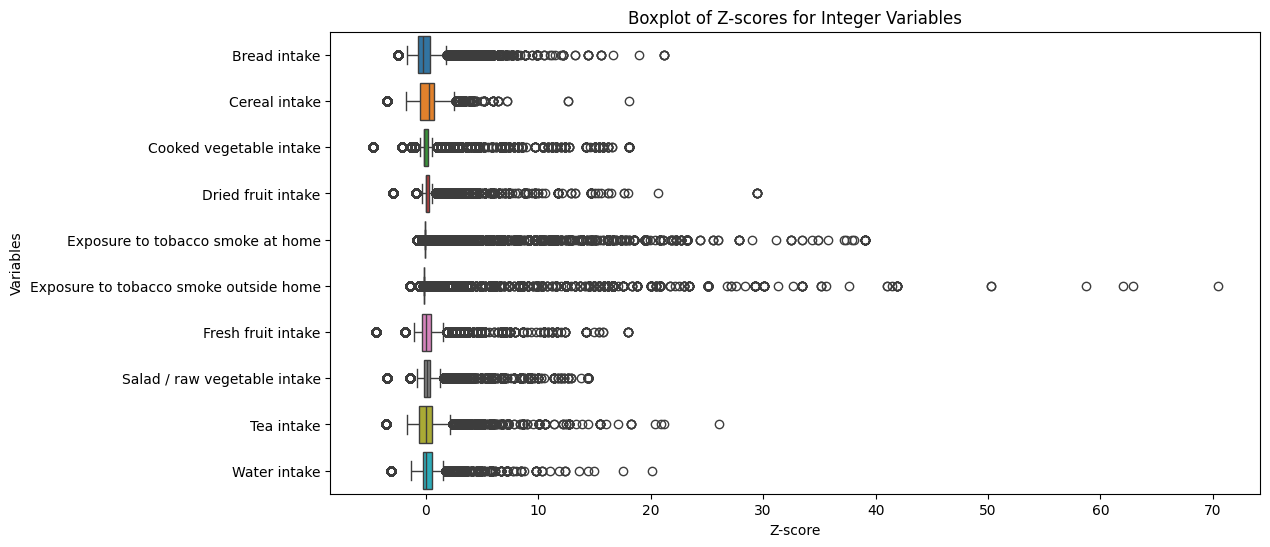

In [77]:
#boxplot to see outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=Z_int.iloc[:, 1:], orient='h')
plt.title('Boxplot of Z-scores for Integer Variables')
plt.xlabel('Z-score')
plt.ylabel('Variables')
plt.show()

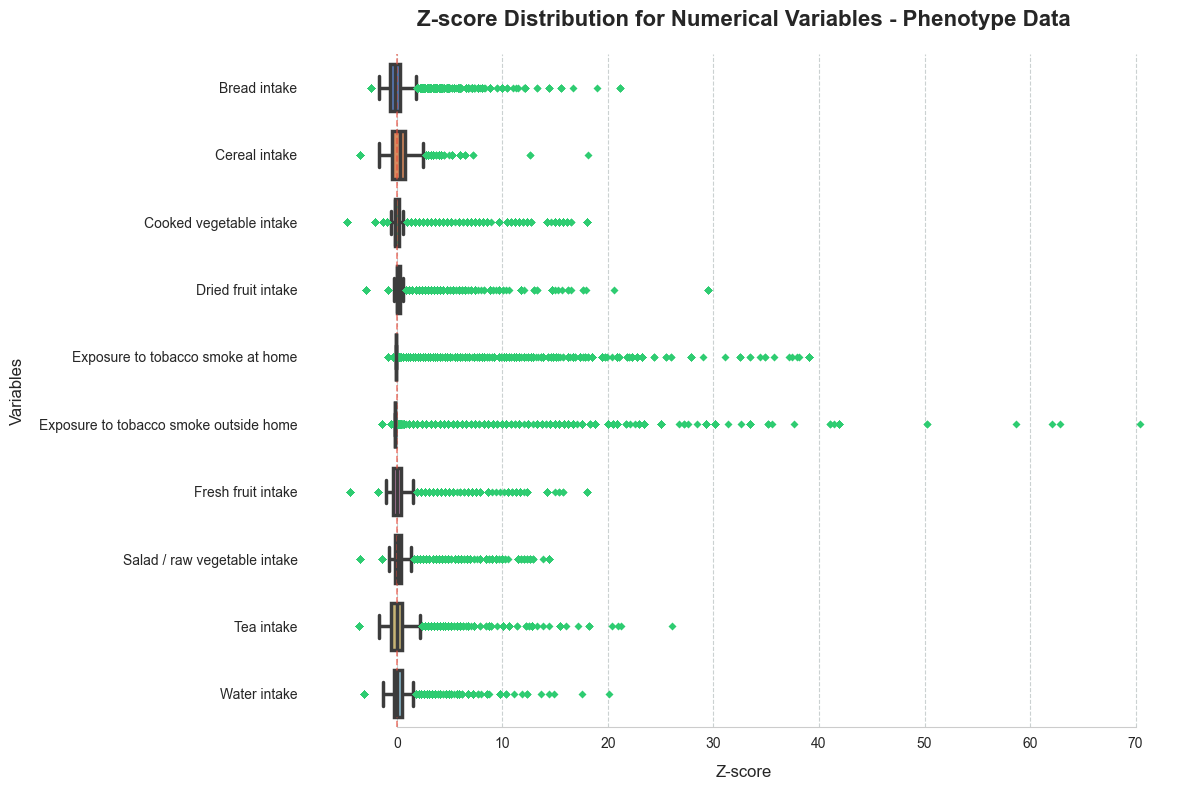

In [92]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")  # Clean grid background
sns.set_palette("muted")     # Professional color scheme

# Create enhanced boxplot
boxplot = sns.boxplot(data=Z_int.iloc[:, 1:], 
                     orient='h', 
                     width=0.7, 
                     linewidth=2.5,
                     flierprops=dict(markerfacecolor='#2ecc71',
                                    marker='D',
                                    markersize=4,
                                    markeredgecolor='none'))

# Customize visual elements
plt.title('Z-score Distribution for Numerical Variables - Phenotype Data', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')
plt.xlabel('Z-score', fontsize=12, labelpad=10)
plt.ylabel('Variables', fontsize=12, labelpad=10)
plt.axvline(0, color='#e74c3c', linestyle='--', linewidth=1.2, alpha=0.7)  # Zero reference line

# Format ticks and text
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()

# Enhance grid visibility
plt.grid(axis='x', 
         linestyle='--', 
         alpha=0.4, 
         color='#7f8c8d')

# Clean up borders
sns.despine(left=True, trim=True)

# Optional annotation
'''
plt.annotate('Outlier values', 
             xy=(3, 0), 
             xytext=(4, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9)
'''

# Export to EPS (add this before plt.show())
plt.savefig('z_scores_boxplot.jpg', 
            format='jpg', 
            dpi=300, 
            bbox_inches='tight')
            #transparent=True)  # Opcional: fondo transparente

plt.show()


The percentage of outliers is calculated.

In [86]:
# Function to print outliers
def print_outliers(df):
    outliers_info = []
    for col in df.select_dtypes(include='number').columns[1:]:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        count_outliers = outliers.shape[0]
        total = df[col].shape[0]
        proportion = count_outliers / total
        # Append to the list
        outliers_info.append({
            'Column': col,
            'Outliers': count_outliers,
            'Total_data': total,
            'Outliers_proportion': proportion
        })
    outliers_df = pd.DataFrame(outliers_info)

    print(outliers_df)

In [87]:
print_outliers(Z_int)

                                   Column  Outliers  Total_data  \
0                            Bread intake     29832      502180   
1                           Cereal intake     22551      502180   
2                 Cooked vegetable intake     82501      502180   
3                      Dried fruit intake     85237      502180   
4       Exposure to tobacco smoke at home     76985      502180   
5  Exposure to tobacco smoke outside home    163156      502180   
6                      Fresh fruit intake     21714      502180   
7            Salad / raw vegetable intake     37377      502180   
8                              Tea intake     22154      502180   
9                            Water intake     42995      502180   

   Outliers_proportion  
0             0.059405  
1             0.044906  
2             0.164286  
3             0.169734  
4             0.153302  
5             0.324895  
6             0.043239  
7             0.074429  
8             0.044116  
9           

Categorical and integer datasets are combined to create the complete dataset.

In [55]:
pheno_f_df = merged_cat_df.merge(wide_df_int_imputed, on="eid", how="outer")

In [57]:
pheno_f_df.head()

,eid,1239,1249,1259,1329,1339,1349,1359,1369,1379,...,1269,1279,1289,1299,1309,1319,1438,1458,1488,1528
0,1000012,0.0,4.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,...,0.0,0.0,2.0,1.0,0.0,2.0,6.0,4.0,4.0,-10.0
1,1000021,0.0,1.0,0.0,1.0,1.0,3.0,3.0,1.0,1.0,...,0.0,0.0,2.0,0.0,0.0,0.0,8.0,3.0,-10.0,4.0
2,1000035,1.0,-999.0,-999.0,1.0,1.0,1.0,3.0,0.0,1.0,...,0.7,0.6,0.0,0.0,0.0,0.0,20.0,2.0,10.0,2.0
3,1000044,0.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,...,0.0,0.0,8.0,8.0,4.0,0.0,28.0,0.0,2.0,4.0
4,1000053,0.0,3.0,0.0,2.0,2.0,1.0,3.0,1.0,1.0,...,0.0,0.0,3.0,2.0,2.0,-10.0,18.0,0.0,2.0,2.0


In [58]:
# Mostrar el tipo de variable de todas las columnas
print(pheno_f_df.dtypes)

# Contar el número de columnas por tipo de variable
tipo_conteo = pheno_f_df.dtypes.value_counts()
print("\nNúmero de columnas por tipo de variable:")
print(tipo_conteo)

eid        int64
1239     float64
1249     float64
1259     float64
1329     float64
1339     float64
1349     float64
1359     float64
1369     float64
1379     float64
1389     float64
1408     float64
1418     float64
1428     float64
1448     float64
1468     float64
1478     float64
1518     float64
1538     float64
1548     float64
1558     float64
1628     float64
2178     float64
2188     float64
2296     float64
2306     float64
2345     float64
2443     float64
2453     float64
2463     float64
2473     float64
2492     float64
20116    float64
20117    float64
20160    float64
21000    float64
6144     float64
6150     float64
6152     float64
6154     float64
6155     float64
6179     float64
1269     float64
1279     float64
1289     float64
1299     float64
1309     float64
1319     float64
1438     float64
1458     float64
1488     float64
1528     float64
dtype: object

Número de columnas por tipo de variable:
float64    51
int64       1
Name: count, dtype: int64


In [ ]:
#phenotype_dr_df.to_excel('nombre_archivo.xlsx', index=False)